In [53]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm

In [54]:
def sigmoidea(x, forward=True):
    if forward:
        return 1 / (1 + np.exp(-x))
    else:
        return x * (1 - x) # In the derivative, 'x' will be sigmoid(x).

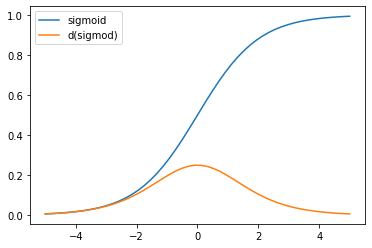

In [55]:
x = np.linspace(-5,5)
y1a = sigmoidea(x)
plt.plot(x,y1a,label='sigmoid')
y1a = sigmoidea(sigmoidea(x),forward=False)
plt.plot(x,y1a,label='d(sigmod)')
plt.legend()

In [61]:
def forward(xi, W1, b1, W2, b2):
    print(xi,W1,type(xi))
    z1 = np.matmul(xi,W1)+b1
    h = sigmoidea(z1)
    ypred = np.matmul(h,W2)+b2
    return ypred, h

In [62]:
def backward(xi, ytrue, h, ypred, params, learning_rate):

    err_output = ypred - ytrue
    grad_W2 = err_output * h
    params['W2'] -= learning_rate * grad_W2

    grad_b2 = err_output
    params['b2'] -= learning_rate * grad_b2

    derivative = sigmoidea(h, forward=False)
    err_hidden = err_output * derivative * params['W2']

    grad_W1 = err_hidden * x
    
    grad_b1 = err_hidden
    params['b1'] -= learning_rate * grad_b1
    
    return params

In [63]:
def initialize_params(features, hidden_layer, seed=42):
    np.random.seed(seed)
    params = {
        "W1": np.random.normal(size=(1,hidden_layer)),
        "b1": np.random.normal(size=(1,hidden_layer)),

        "W2": np.random.normal(size=(hidden_layer,1)),
        "b2": np.random.normal(size=(1,1))
    }
    return params

In [64]:
def kosi(xi,ytrue):
    xi = np.random.uniform(0,np.pi/2,1)
    ytrue = np.array(np.cos(4*xi))**2
    return ytrue

In [67]:
num_epochs = 1000
learning_rate = 0.01
hidden_layer = 4

features = 1
err = []

params = initialize_params(features, hidden_layer)

for epoch in tqdm(range(num_epochs)):
     # Training.
    error = 0
    for i in range(5000):
        xi = np.random.uniform(0,np.pi/2,1)
        ytrue = np.array(np.cos(4*xi))**2
        
        ypred, h = forward(xi, **params)
        error += (ytrue-ypred) ** 2
        error = error
        #y.append(ytrue)
        #y_hat.append(ypred.item())

        params = backward(xi, ytrue,
                          h, error[0],
                          params,
                          learning_rate)

        err.append(error[0])
    #loss_history.append(mse(y, y_hat))
    if epoch % 100 == 0:
        print(f'epoch {epoch}: error is {error[0][0]}')
print(f'epoch {epoch}: error is {error[0][0]}')
print('Finished')

  0%|          | 0/1000 [00:00<?, ?it/s]

[0.67849765] [[ 0.49671415 -0.1382643   0.64768854  1.52302986]] <class 'numpy.ndarray'>


ValueError: non-broadcastable output operand with shape (4,1) doesn't match the broadcast shape (4,4)